In [1]:
# %pip install feedparser

  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=a8b7e6dbcef031de83ec78f0e0d35a50577a5218a1f81206d9ed39aacbb85f19
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\65\7a\a7\78c287f64e401255dff4c13fdbc672fed5efbfd21c530114e1
Successfully built sgmllib3k



In [ ]:
# Expansion ideas: мы расширяем наши источники через RSS-ленты, если источник не поддерживает RSS, то можно рассмотреть переходные варианты)

In [1]:
import feedparser

class RSSParser:
    def __init__(self, sources: dict[str,str]):
        self.sources = sources

    def fetch_entries(self) -> list[dict]:
        entries = []
        for source, url in self.sources.items():
            feed = feedparser.parse(url)
            for entry in feed['entries']:
                entry['source'] = source
                entries.append(entry)
        return entries

    def standardize_general(self, entry: dict) -> dict:
        """ Turns entry to a standardized format

        Args:
            entry (dict): entry from feedparser

        Returns:
            dict: standardized entry in a format:
        {
            'source': str,
            'title': str,
            'url':  str,
            'date': timestamp with zone,
            'tags': list[str],
            'text': str,
        }
        """
        return {
            'source': entry['source'],
            'title': entry['title'],
            'url':  entry['link'],
            'date': entry['published'],
            'tags': [tag['term'] for tag in entry['tags']] if 'tags' in entry else [],
            # 'text': entry['summary'],
        }

    def get_last_standardized_news(self) -> list[dict]:
        entries = self.fetch_entries()
        return [self.standardize_general(entry) for entry in entries]

SOURCES = {
    # Habr
    'habr': 'https://habr.com/ru/rss/all/all/?fl=ru',

    # Rubase
    ## By companies
    'rb_chance': "https://rb.ru/feeds/tag/chance/",
    # 'rb_vk': "https://rb.ru/feeds/tag/vk/",
    'rb_rvc': "https://rb.ru/feeds/tag/rvc/",
    'rb_yandex': "https://rb.ru/feeds/tag/yandex/",
    'rb_skolkovo': "https://rb.ru/feeds/tag/skolkovo/",
    # 'rb_facebook': "https://rb.ru/feeds/tag/facebook/",
    'rb_mailru': "https://rb.ru/feeds/tag/mailru/",
    # 'rb_microsoft': "https://rb.ru/feeds/tag/microsoft/",

    ## By topics
    'rb_advertising': "https://rb.ru/feeds/tag/advertising/",
    'rb_robotics': "https://rb.ru/feeds/tag/robotics/",
    'rb_it': "https://rb.ru/feeds/tag/it/",
    'rb_bigdata': "https://rb.ru/feeds/tag/bigdata/",
    'rb_china': "https://rb.ru/feeds/tag/china/",
    'rb_finance': "https://rb.ru/feeds/tag/fintech/",
    'rb_cloud': "https://rb.ru/feeds/tag/cloud/",

    # Vedomosti
    'vd_business': "https://www.vedomosti.ru/rss/rubric/business",
    'vd_it_business': "https://www.vedomosti.ru/rss/rubric/it_business",
    'vd_finance': "https://www.vedomosti.ru/rss/rubric/finance",
    'vd_opinion': "https://www.vedomosti.ru/rss/rubric/opinion",
    'vd_analytics': "https://www.vedomosti.ru/rss/rubric/opinion/analytics",


    # RT
    'rt': "https://russian.rt.com/rss/",
}

entries = RSSParser(SOURCES).get_last_standardized_news()


In [74]:
print(len(entries))


1110


In [75]:
import feedparser
def test_get_sample_entry_from_rss(url: str):
    feed = feedparser.parse(url)
    return feed['entries'][0]

In [76]:
# test habr
test_get_sample_entry_from_rss(SOURCES['habr'])

{'title': 'Личный сервер shadowsocks за 10 минут без затрат (часть 3)',
 'title_detail': {'type': 'text/plain',
  'language': None,
  'base': 'https://habr.com/ru/rss/all/all/?fl=ru',
  'value': 'Личный сервер shadowsocks за 10 минут без затрат (часть 3)'},
 'id': 'https://habr.com/ru/post/692172/',
 'guidislink': True,
 'link': 'https://habr.com/ru/post/692172/?utm_source=habrahabr&utm_medium=rss&utm_campaign=692172',
 'links': [{'rel': 'alternate',
   'type': 'text/html',
   'href': 'https://habr.com/ru/post/692172/?utm_source=habrahabr&utm_medium=rss&utm_campaign=692172'}],
 'summary': '<p>Это - отдельное руководство, описывающее ещё один способ получить личный<br /> прокси-сервер shadowsocks бесплатно и служащее продолжением к моей <a href="https://habr.com/ru/post/556464/" rel="noopener noreferrer nofollow">предыдущей статье</a>. В этот раз мы воспользуемся сервисом <a href="https://replit.com/" rel="noopener noreferrer nofollow">Replit</a>.</p><p>В этот раз всё будет намного прощ

In [77]:
#test any of rb_*
test_get_sample_entry_from_rss(SOURCES['rb_chance'])

{'title': 'Бизнес-инкубатор ВШЭ открывает прием заявок на HSE Startup Cup 2022',
 'title_detail': {'type': 'text/plain',
  'language': None,
  'base': 'https://rb.ru/feeds/tag/chance/',
  'value': 'Бизнес-инкубатор ВШЭ открывает прием заявок на HSE Startup Cup 2022'},
 'links': [{'rel': 'alternate',
   'type': 'text/html',
   'href': 'https://rb.ru/partners/hse-startup-cup-2022/'},
  {'length': '10207104',
   'type': 'image/jpeg',
   'href': 'https://media.rbcdn.ru/media/news/annie-spratt-dwyu3i-mqeo-unsplash_ToEApDf.jpg',
   'rel': 'enclosure'}],
 'link': 'https://rb.ru/partners/hse-startup-cup-2022/',
 'summary': 'HSE Startup Cup — это масштабный конкурс стартапов для студентов, аспирантов, преподавателей и сотрудников университета ВШЭ. Его участники получат помощь в запуске проекта и финансирование. Подать заявку можно до 15 октября.',
 'summary_detail': {'type': 'text/html',
  'language': None,
  'base': 'https://rb.ru/feeds/tag/chance/',
  'value': 'HSE Startup Cup — это масштабны

In [78]:
# Test VEDOMOSTI
test_get_sample_entry_from_rss(SOURCES['vd_business'])



{'title': 'Путин поручил создать российского оператора проекта «Сахалин-1»',
 'title_detail': {'type': 'text/plain',
  'language': None,
  'base': 'https://www.vedomosti.ru/rss/rubric/business',
  'value': 'Путин поручил создать российского оператора проекта «Сахалин-1»'},
 'links': [{'rel': 'alternate',
   'type': 'text/html',
   'href': 'https://www.vedomosti.ru/business/news/2022/10/07/944476-putin-poruchil-sozdat-operatora'},
  {'type': 'image/jpeg',
   'href': 'https://cdn.vdmsti.ru/image/2022/7s/19ubht/normal-1net.jpg',
   'rel': 'enclosure'}],
 'link': 'https://www.vedomosti.ru/business/news/2022/10/07/944476-putin-poruchil-sozdat-operatora',
 'id': 'https://www.vedomosti.ru/business/news/2022/10/07/944476-putin-poruchil-sozdat-operatora',
 'guidislink': False,
 'pdalink': 'https://www.vedomosti.ru/business/news/2022/10/07/944476-putin-poruchil-sozdat-operatora',
 'authors': [{}],
 'author': '',
 'tags': [{'term': 'Бизнес', 'scheme': None, 'label': None}],
 'published': 'Fri, 07

In [79]:
# Test rt
test_get_sample_entry_from_rss(SOURCES['rt'])

{'title': 'Ферстаппен выиграл третью свободную практику Гран-при Японии',
 'title_detail': {'type': 'text/plain',
  'language': None,
  'base': 'https://russian.rt.com/rss',
  'value': 'Ферстаппен выиграл третью свободную практику Гран-при Японии'},
 'links': [{'rel': 'alternate',
   'type': 'text/html',
   'href': 'https://russian.rt.com/sport/news/1058509-ferstappen-luchshii-rezultat?utm_source=rss&utm_medium=rss&utm_campaign=RSS'}],
 'link': 'https://russian.rt.com/sport/news/1058509-ferstappen-luchshii-rezultat?utm_source=rss&utm_medium=rss&utm_campaign=RSS',
 'id': 'https://russian.rt.com/sport/news/1058509-ferstappen-luchshii-rezultat?utm_source=rss&utm_medium=rss&utm_campaign=RSS',
 'guidislink': False,
 'summary': 'Пилот Red Bull Макс Ферстаппен показал лучшее время на третьей тренировке Гран-при Японии «Формулы-1». <br /><a href="https://russian.rt.com/sport/news/1058509-ferstappen-luchshii-rezultat?utm_source=rss&amp;utm_medium=rss&amp;utm_campaign=RSS">Читать далее</a>',
 's

In [ ]:
#title, date, url, text, tags


Total news: 410
Unique tags:
dict_keys(['Политика', 'Общество', 'Финансы', 'Экономика', 'Маркетинг', 'PR', 'HR', 'Криптовалюты', 'Учет и налогообложение', 'Компании', 'Рынки', 'Бизнес', 'Технологии', 'Автоматизация', 'Мобилизация', 'Медиа', 'Бухгалтеру', 'Работодателю', 'Вебинары для бухгалтеров', 'Банкротство', 'Кредитование', 'Инвестиции', 'Банки', 'Санкции 2022', 'Трудовое право', 'Общее', 'Карьера', 'Авто', 'Политика / Армия и спецслужбы', 'Интернет и IT', 'Экономика России', 'IT-компании', 'Электронные трудовые книжки', 'ЕГАИС', 'Налоги, взносы, пошлины', 'ЭДО', 'НДФЛ', 'АУСН', 'Перевозка', 'Отчетность в ПФР', 'Мошенничество', 'Первичные документы', 'Экономические преступления', 'ПСН', 'Онлайн-кассы'])


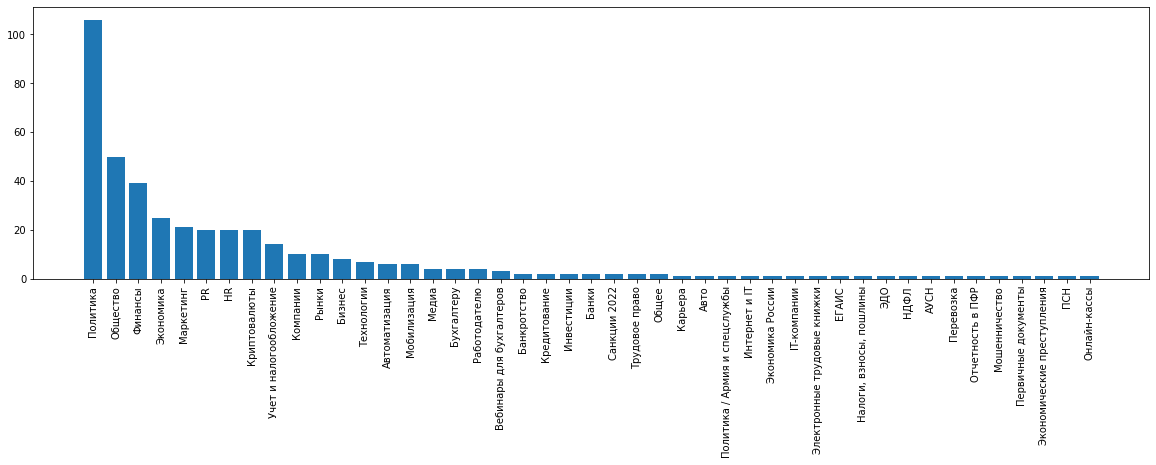

In [29]:
import feedparser

# SOURCES = {
#     # Habr
#     # 'habr': 'https://habr.com/ru/rss/all/all/?fl=ru',

#     # Rubase
#     ## By companies
#     # 'rb_chance': "https://rb.ru/feeds/tag/chance/",
#     # 'rb_vk': "https://rb.ru/feeds/tag/vk/",
#     'rb_rvc': "https://rb.ru/feeds/tag/rvc/",
#     # 'rb_yandex': "https://rb.ru/feeds/tag/yandex/",
#     'rb_skolkovo': "https://rb.ru/feeds/tag/skolkovo/",
#     # 'rb_facebook': "https://rb.ru/feeds/tag/facebook/",
#     'rb_mailru': "https://rb.ru/feeds/tag/mailru/",
#     # 'rb_microsoft': "https://rb.ru/feeds/tag/microsoft/",

#     ## By topics
#     'rb_advertising': "https://rb.ru/feeds/tag/advertising/",
#     # 'rb_robotics': "https://rb.ru/feeds/tag/robotics/",
#     # 'rb_it': "https://rb.ru/feeds/tag/it/",
#     # 'rb_bigdata': "https://rb.ru/feeds/tag/bigdata/",
#     'rb_china': "https://rb.ru/feeds/tag/china/",
#     'rb_finance': "https://rb.ru/feeds/tag/fintech/",
#     # 'rb_cloud': "https://rb.ru/feeds/tag/cloud/",

#     # Vedomosti
#     # 'vd_business': "https://www.vedomosti.ru/rss/rubric/business",
#     # 'vd_it_business': "https://www.vedomosti.ru/rss/rubric/it_business",
#     # 'vd_finance': "https://www.vedomosti.ru/rss/rubric/finance",
#     # 'vd_opinion': "https://www.vedomosti.ru/rss/rubric/opinion",
#     # 'vd_analytics': "https://www.vedomosti.ru/rss/rubric/opinion/analytics",


#     # RT
#     # 'rt': "https://russian.rt.com/rss/",
# }


SOURCES = {
    # "rt": "https://russian.rt.com/rss",
    "vd": "https://www.vedomosti.ru/rss/news",

    # for buhgalter
    "buh": "https://buh.ru/rss/?chanel=news",
    "klerk": "https://www.klerk.ru/export/news.rss",
    "audit-it": "http://www.audit-it.ru/rss/news_all.xml",
    # "rb": "https://rb.ru/feeds/all/",

    # for business owner
    # "rb": "https://rb.ru/feeds/all/",
    "rb_pr": "https://rb.ru/feeds/tag/pr/",
    "rb_finance": "https://rb.ru/feeds/tag/fintech/",
    "rb_hr": "https://rb.ru/feeds/tag/hr/",
    "rb_crypto": "https://rb.ru/feeds/tag/crypto/",
    "rb_marketing": "https://rb.ru/feeds/tag/marketing/",
    "rmblr_finance": "https://finance.rambler.ru/rss/economics/",
    "rmblr_business": "https://finance.rambler.ru/rss/business/",
    "rmblr_markets": "https://finance.rambler.ru/rss/markets/",
}

rb_topics = {
    "rb_pr":"PR",
    "rb_finance":"Финансы",
    "rb_hr":"HR",
    "rb_crypto":"Криптовалюты",
    "rb_marketing":"Маркетинг",
}

class RSSParser:
    def __init__(self, sources: dict[str,str]):
        self.sources = sources

    def fetch_entries(self) -> list[dict]:
        entries = []
        for source, url in self.sources.items():
            feed = feedparser.parse(url)
            # If there is no tags for entries, skip source and print warning
            if not feed['entries'][0].get('tags') and source not in rb_topics:
                print(f"Warning: No tags for source {source}")
                continue

            for entry in feed['entries']:
                entry['source'] = source
                entries.append(entry)
        return entries

    def standardize_general(self, entry: dict) -> dict:
        """ Turns entry to a standardized format

        Args:
            entry (dict): entry from feedparser

        Returns:
            dict: standardized entry in a format:
        {
            'source': str,
            'title': str,
            'url':  str,
            'date': timestamp with zone,
            'tags': list[str],
            'text': str,
        }
        """
        entry =  {
            'source': entry['source'],
            'title': entry['title'].replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').strip(),
            'url':  entry['link'],
            'date': entry['published_parsed'],
            'tags': [tag['term'] for tag in entry['tags']] if 'tags' in entry else [rb_topics[entry['source']]] if entry['source'] in rb_topics else [],
            'text': entry['summary'] if 'summary' in entry else '',
        }
        # pprint(entry)

        return entry

    def get_last_standardized_news(self) -> list[dict]:
        entries = self.fetch_entries()
        return [self.standardize_general(entry) for entry in entries]


if __name__ == '__main__':
    parser = RSSParser(SOURCES)
    from pprint import pprint
    news = parser.get_last_standardized_news()

    # Count every tag occurence
    tags = {}
    for entry in news:
        for tag in entry['tags']:
            if tag not in tags:
                tags[tag] = 0
            tags[tag] += 1

    # Plot tag distribution
    import matplotlib.pyplot as plt
    # Sort by value
    # Set plot size
    plt.rcParams["figure.figsize"] = (20,5)
    tags = {k: v for k, v in sorted(tags.items(), key=lambda item: item[1], reverse=True)}
    plt.bar(tags.keys(), tags.values())


    print(f"Total news: {len(news)}")

    # Print unique tags
    print("Unique tags:")
    print(tags.keys())

    plt.xticks(rotation=90)
    plt.show()




In [ ]:
# list for gendir
gen_list =  ['Финансы', 'Экономика', 'Маркетинг', 'PR', 'HR',  'Компании', 'Рынки', 'Бизнес', 'Технологии', 'Автоматизация', 'Мобилизация',  'Работодателю', 'Кредитование', 'Инвестиции', 'Санкции 2022',  'Общее', 'Карьера',  'Экономика России', 'IT-компании',  'Налоги, взносы, пошлины',  'Мошенничество', 'Экономические преступления']


# list for buhgalter
buh_list = ['Финансы', 'Экономика',  'Криптовалюты', 'Учет и налогообложение', 'Бизнес', 'Бухгалтеру',  'Вебинары для бухгалтеров', 'Банкротство', 'Кредитование', 'Банки',  'Трудовое право', 'Экономика России',  'Электронные трудовые книжки', 'ЕГАИС', 'Налоги, взносы, пошлины', 'ЭДО', 'НДФЛ', 'АУСН', 'Перевозка', 'Отчетность в ПФР', 'Мошенничество', 'Первичные документы', 'Экономические преступления', 'ПСН', 'Онлайн-кассы']